In [143]:
import os
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot
from sklearn import linear_model
import tensorflow as tf
print(tf.__version__)

2.7.0


In [4]:
df = pd.read_csv("BDC - Main.csv")

In [5]:
years = df.iloc[:0, 1:]

In [6]:
yearsList = list(years)

In [7]:
changes = df.iloc[0:1, 1:]

In [8]:
changesList = changes.values.tolist()[0]

In [9]:
CEList = []
CEList.append(round(changesList[0], 2))
for i in range(1, len(changesList)):
    CEList.append(round(CEList[i - 1] + changesList[i], 2))

In [10]:
ghg = df.iloc[1:, 1:]

In [11]:
ghg = ghg.values.tolist()[0]

In [12]:
ghgList = []
ghgList.append(round(ghg[0], 2))
for i in range(1, len(ghg)):
    ghgList.append(round(ghgList[i - 1] + ghg[i], 2))

In [13]:
print(yearsList)

['1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']


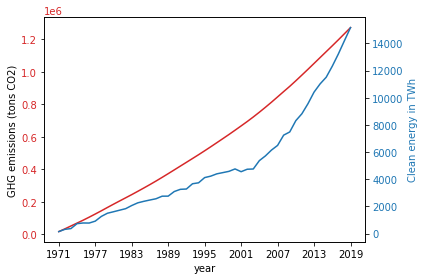

In [14]:
fig, ax1 = pyplot.subplots()

color = 'tab:red'

ax1.set_xlabel("year")
ax1.set_ylabel("GHG emissions (tons CO2)")
ax1.plot(yearsList, ghgList, color=color)
ax1.xaxis.set_major_locator(pyplot.MaxNLocator(10))
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Clean energy in TWh', color=color)  # we already handled the x-label with ax1
ax2.plot(yearsList, CEList, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
pyplot.show()

In [15]:
# since measuring the absolute value might not be accurate, we could also measure the change rate

In [16]:
pctGHG = []
pctCE = []

for i in range(len(CEList) - 1):
    pctCE.append(round(CEList[i + 1] - CEList[i], 2))
    pctGHG.append(round((ghgList[i + 1] - ghgList[i]) / ghgList[i] * 100, 2))

# pctCE.append(pctCE[len(pctCE)- 1])
# pctGHG.append(pctCE[len(pctCE)- 1])

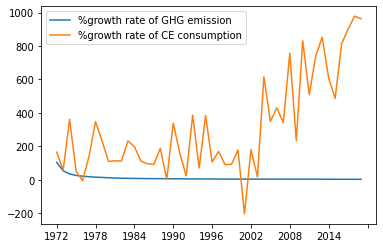

In [17]:
fig, ax1 = pyplot.subplots()

pyplot.plot(yearsList[1:], pctGHG)
pyplot.plot(yearsList[1:], pctCE)
pyplot.legend(["%growth rate of GHG emission", "%growth rate of CE consumption"])

ax1.xaxis.set_major_locator(pyplot.MaxNLocator(10))


pyplot.show()

In [18]:
# linear regression starts here
import tensorflow as tf

In [19]:
learning_rate = 0.01
training_epochs = 100

x_train = CEList
y_train = ghgList
n = len(x_train)

for _ in range(100):
    linear = linear_model.LinearRegression

# print(weight.numpy())
# print(bias.numpy())

pyplot.show()

In [20]:
df = pd.read_csv("canadaDataCapacity.csv")

In [21]:
df

,Canada,"Electricity - total net installed capacity of electric power plants, main activity & autoproducer",2018,"Kilowatts, thousand",148762
0,Canada,Electricity - total net installed capacity of ...,2017,"Kilowatts, thousand",147449
1,Canada,Electricity - total net installed capacity of ...,2016,"Kilowatts, thousand",146601
2,Canada,Electricity - total net installed capacity of ...,2015,"Kilowatts, thousand",144846
3,Canada,Electricity - total net installed capacity of ...,2014,"Kilowatts, thousand",137859
4,Canada,Electricity - total net installed capacity of ...,2013,"Kilowatts, thousand",134933
...,...,...,...,...,...
625,Canada,Electricity - total net installed capacity of ...,1994,"Kilowatts, thousand",6592
626,Canada,Electricity - total net installed capacity of ...,1993,"Kilowatts, thousand",6408
627,Canada,Electricity - total net installed capacity of ...,1992,"Kilowatts, thousand",6074
628,Canada,Electricity - total net installed capacity of ...,1991,"Kilowatts, thousand",6155


In [22]:
def deletCols(df, keep):
    remove = []
    for i in range(len(df.columns)):
        column = df.columns[i]
        if(column not in keep):
            remove.append(column)

    return df.drop(remove, axis=1)

def renameCols(df, suffix):
    for column in df.columns:
        df = df.rename(columns={column: f'{column}_{suffix}'})
    
    return df

def setCol(df, idx):
    df.columns = df.iloc[0]
    df = df.drop(df.index[0])

    return df
    

In [23]:
#Transposing Data
ghg = pd.read_csv("GHG Energy.csv")
#reset column header to year
ghg.columns = ghg.iloc[2]
ghg = ghg.reset_index(drop=True)
ghg.columns.name = None
#move years (the current column header) to the index
ghg = ghg.transpose()
#set country names as column headers
ghg = setCol(ghg, 0)
#remove name
ghg.columns.name = None
#remove all columns with header name null
ghg = ghg.loc[:, ghg.columns.notnull()]

#Remove columns
col_keep = ["World"]
start = 0
end = 0

for i in range(len(ghg.columns)):
    column = ghg.columns[i]
    if column == "Canada":
        start = i
    if column == "Middle East":
        end = i

for i in range(start, end):
    col_keep.append(ghg.columns[i])

ghg = deletCols(ghg, col_keep)

ghg = renameCols(ghg, "ghg")

ghg.head()

,World_ghg,Canada_ghg,Chile_ghg,Mexico_ghg,United States_ghg,OECD Americas_ghg,Australia_ghg,Israel_ghg,Japan_ghg,Korea_ghg,...,Jordan_ghg,Kuwait_ghg,Lebanon_ghg,Oman_ghg,Qatar_ghg,Saudi Arabia_ghg,Syrian Arab Republic _ghg,United Arab Emirates_ghg,Yemen_ghg,Africa_ghg
1971,16121,366,22,118,4581,5118,151,14,762,56,...,1,65,5,13,13,88,13,36,1,525
1972,16840,385,22,131,4825,5395,157,15,799,58,...,2,66,5,13,14,104,14,40,1,533
1973,17771,404,21,143,4987,5589,166,16,909,72,...,2,59,7,13,15,124,14,46,2,561
1974,17722,413,21,156,4823,5448,181,16,896,75,...,2,48,7,13,15,139,17,51,2,558
1975,17768,404,18,163,4631,5249,189,17,860,82,...,2,40,6,13,17,142,22,56,2,579


In [24]:
canadaGhg = ghg.iloc[1:, 1:2]

In [25]:
caGHG = []
for i in range(len(canadaGhg)):
    caGHG.append(canadaGhg[i])

KeyError: 0

In [ ]:
<h1>RDD<h1>

In [26]:
df = pd.read_csv("R&D.csv")

In [27]:
df

,Country,Indicator,1974,1975,1976,1977,1978,1979,1980,1981,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020 Estimated
0,Australia,Nominal GDP NC (millions),71103.031,83087.352,96085.056,105025.856,118728.874,134239.672,152144.832,175704.096,...,1498833.968,1536035.184,1598663.97,1624021.71,1660714,1761781.077,1848721.539,1952996.446,1984850.562,1957708.319
1,Australia,Energy Technology RD&D Budget NC(millions),..,..,..,..,..,19.84,41.69,54.6,...,591.164,770.658,960.827,310.878,280.173,169.731,203.322,237.017,110.805,..
2,Australia,RD&D per thousand units of GDP,..,..,..,..,..,0.148,0.274,0.311,...,0.394,0.502,0.601,0.191,0.169,0.096,0.11,0.121,0.056,..
3,Austria,Nominal GDP NC (millions),47747.448,50677.221,55932.258,61858.398,65454.464,71862.595,77100.6,82191.6,...,309975.478,318515.326,324014.361,333314.136,344269,357438.124,369251.688,385416.9,397618.339,377289.716
4,Austria,Energy Technology RD&D Budget NC(millions),..,..,..,19.832,26.068,22.835,25.903,25.537,...,120.823,120.101,124.555,143.101,128.415,140.894,139.34,151.402,149.107,155.183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,United Kingdom,Energy Technology RD&D Budget NC(millions),91.2,110.9,131.9,123.84,168.16,190.09,225.33,270.15,...,351.143,317.583,405.674,344.557,378.602,484.569,654.24,740.99,817.883,932.741
92,United Kingdom,RD&D per thousand units of GDP,1.033,1.015,1.022,0.821,0.961,0.918,0.926,1.003,...,0.211,0.186,0.228,0.185,0.197,0.243,0.316,0.346,0.369,0.442
93,United States,Nominal GDP NC (millions),1544608.962,1683176.37,1873454.1,2083811.84,2350349.172,2630373.305,2856987.808,3205036.146,...,15545659.72,16200394.16,16792208.17,17534868.96,18238301,18735940.36,19533670.61,20607789.03,21432674.98,20936118.68
94,United States,Energy Technology RD&D Budget NC(millions),808.6,1223.6,1520.3,2465.7,3060.9,3645.6,3915,3298.6,...,6371.08,6175.64,5931.383,6216.559,6055.414,6241.313,6380.107,7392.431,8061.872,8764.756


In [28]:
rd_ca = df[df['Country'] == "Canada"]

rd_ca_gdp = rd_ca[rd_ca['Indicator'] == "Nominal GDP NC (millions)"]
rd_ca_rdd = rd_ca[rd_ca['Indicator'] == "Energy Technology RD&D Budget NC(millions) "]
rd_ca_perUnit = rd_ca[rd_ca['Indicator'] == "RD&D per thousand units of GDP "]

In [29]:
rddUnitList = rd_ca_perUnit.values.tolist()
rddUnitList = rddUnitList[0][2:-1]
for i in range(len(rddUnitList)):
    rddUnitList[i] = float(rddUnitList[i])
newYearsList = yearsList[3:]

In [30]:
GDPCanada = rd_ca_gdp.values.tolist()
GDPCanada = GDPCanada[0][2:-1]
for i in range(len(GDPCanada)):
    GDPCanada[i] = round(float(GDPCanada[i]), 2)


In [31]:
canadaGhgNew = canadaGhg[2:-1]
canadaGhgNew = canadaGhgNew.values.tolist()
canadaGhgNew = canadaGhgNew
for i in range(len(canadaGhgNew)):
    canadaGhgNew[i] = float(canadaGhgNew[i][0])

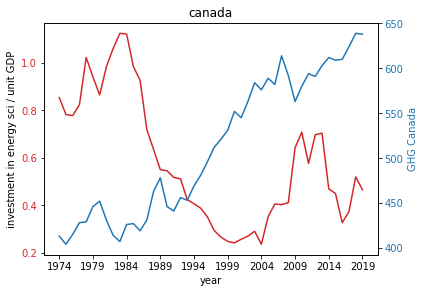

In [32]:
fig, ax1 = pyplot.subplots()

color = 'tab:red'

ax1.set_xlabel("year")
ax1.set_ylabel("investment in energy sci / unit GDP")
ax1.plot(newYearsList, rddUnitList, color=color)
ax1.xaxis.set_major_locator(pyplot.MaxNLocator(10))
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('GHG Canada', color=color)  # we already handled the x-label with ax1
ax2.plot(newYearsList, canadaGhgNew, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
pyplot.title("canada")
pyplot.show()

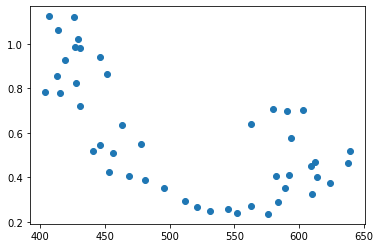

In [33]:
pyplot.scatter(canadaGhgNew, rddUnitList)

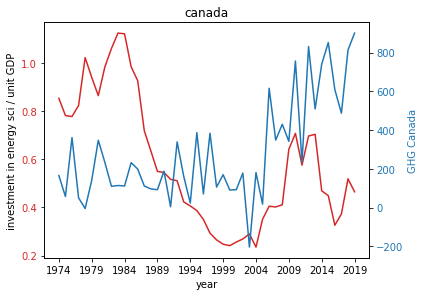

In [34]:
fig, ax1 = pyplot.subplots()

color = 'tab:red'

ax1.set_xlabel("year")
ax1.set_ylabel("investment in energy sci / unit GDP")
ax1.plot(newYearsList, rddUnitList, color=color)
ax1.xaxis.set_major_locator(pyplot.MaxNLocator(10))
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


pctCE = pctCE[:-2]

color = 'tab:blue'
ax2.set_ylabel('GHG Canada', color=color)  # we already handled the x-label with ax1
ax2.plot(newYearsList, pctCE, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
pyplot.title("canada")
pyplot.show()

In [35]:
def GHG_INV(country):
    rd_c = df[df['Country'] == country]

    rd_c_gdp = rd_ca[rd_c['Indicator'] == "Nominal GDP NC (millions)"]
    rd_c_rdd = rd_ca[rd_c['Indicator'] == "Energy Technology RD&D Budget NC(millions) "]
    rd_c_perUnit = rd_ca[rd_c['Indicator'] == "RD&D per thousand units of GDP "]
    
    cGhg = ghg[country + "_ghg"]
    cGhg = cGhg[3:-1]
    
    cGhg = cGhg.values.tolist()
    for i in range(len(cGhg)):
        cGhg[i] = float(cGhg[i][0])
    
    cUnitList = rd_c_perUnit.values.tolist()
    cUnitList = cUnitList[0][2:-1]
    for i in range(len(cUnitList)):
        cUnitList[i] = float(cUnitList[i])
    newYearsList = yearsList[3:]
    

    fig, ax1 = pyplot.subplots()

    color = 'tab:red'

    ax1.set_xlabel("year")
    ax1.set_ylabel("investment in energy sci / unit GDP")
    ax1.plot(newYearsList, cUnitList, color=color)
    ax1.xaxis.set_major_locator(pyplot.MaxNLocator(10))
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('GHG ' + country, color=color)  # we already handled the x-label with ax1
    ax2.plot(newYearsList,  cGhg, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    pyplot.title(country)
    pyplot.show()
    
    pyplot.scatter(cGhg, cUnitList)
    pyplot.show()

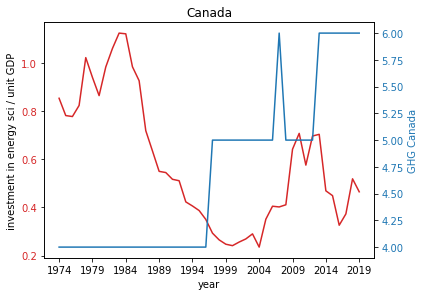

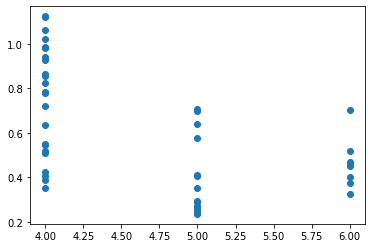

In [36]:
GHG_INV("Canada")

In [37]:
df

,Country,Indicator,1974,1975,1976,1977,1978,1979,1980,1981,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020 Estimated
0,Australia,Nominal GDP NC (millions),71103.031,83087.352,96085.056,105025.856,118728.874,134239.672,152144.832,175704.096,...,1498833.968,1536035.184,1598663.97,1624021.71,1660714,1761781.077,1848721.539,1952996.446,1984850.562,1957708.319
1,Australia,Energy Technology RD&D Budget NC(millions),..,..,..,..,..,19.84,41.69,54.6,...,591.164,770.658,960.827,310.878,280.173,169.731,203.322,237.017,110.805,..
2,Australia,RD&D per thousand units of GDP,..,..,..,..,..,0.148,0.274,0.311,...,0.394,0.502,0.601,0.191,0.169,0.096,0.11,0.121,0.056,..
3,Austria,Nominal GDP NC (millions),47747.448,50677.221,55932.258,61858.398,65454.464,71862.595,77100.6,82191.6,...,309975.478,318515.326,324014.361,333314.136,344269,357438.124,369251.688,385416.9,397618.339,377289.716
4,Austria,Energy Technology RD&D Budget NC(millions),..,..,..,19.832,26.068,22.835,25.903,25.537,...,120.823,120.101,124.555,143.101,128.415,140.894,139.34,151.402,149.107,155.183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,United Kingdom,Energy Technology RD&D Budget NC(millions),91.2,110.9,131.9,123.84,168.16,190.09,225.33,270.15,...,351.143,317.583,405.674,344.557,378.602,484.569,654.24,740.99,817.883,932.741
92,United Kingdom,RD&D per thousand units of GDP,1.033,1.015,1.022,0.821,0.961,0.918,0.926,1.003,...,0.211,0.186,0.228,0.185,0.197,0.243,0.316,0.346,0.369,0.442
93,United States,Nominal GDP NC (millions),1544608.962,1683176.37,1873454.1,2083811.84,2350349.172,2630373.305,2856987.808,3205036.146,...,15545659.72,16200394.16,16792208.17,17534868.96,18238301,18735940.36,19533670.61,20607789.03,21432674.98,20936118.68
94,United States,Energy Technology RD&D Budget NC(millions),808.6,1223.6,1520.3,2465.7,3060.9,3645.6,3915,3298.6,...,6371.08,6175.64,5931.383,6216.559,6055.414,6241.313,6380.107,7392.431,8061.872,8764.756


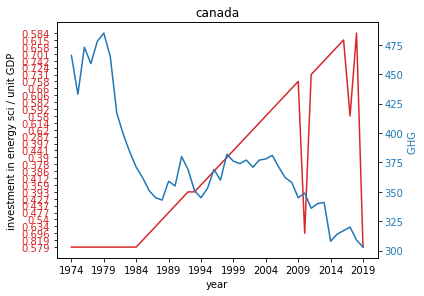

TypeError: 'value' must be an instance of str or bytes, not a float

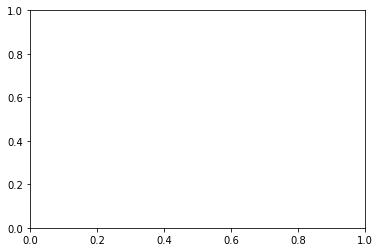

In [39]:
country = "France"
rd_c = df.loc[df['Country'] == country]

rd_c_gdp = rd_c[rd_c['Indicator'] == "Nominal GDP NC (millions)"]
rd_c_rdd = rd_c[rd_c['Indicator'] == "Energy Technology RD&D Budget NC(millions) "]
rd_c_perUnit = rd_c[rd_c['Indicator'] == "RD&D per thousand units of GDP "]
# print(rd_c_perUnit)

cGhg = ghg[country + "_ghg"]
cGhg = cGhg[3:-1]

cGhg = cGhg.values.tolist()


for i in range(len(cGhg)):
    cGhg[i] = int(cGhg[i])

cUnitList = rd_c_perUnit.values.tolist()
cUnitList = cUnitList[0][2:-1]
for i in range(len(cUnitList)):
    if(cUnitList[i] == ".."):
        cUnitList[i] = cUnitList[i - 1]
    else:
        cUnitList[i] = float(cUnitList[i])
    
newYearsList = yearsList[3:]


fig, ax1 = pyplot.subplots()

color = 'tab:red'

ax1.set_xlabel("year")
ax1.set_ylabel("investment in energy sci / unit GDP")
ax1.plot(newYearsList, cUnitList, color=color)
ax1.xaxis.set_major_locator(pyplot.MaxNLocator(10))
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('GHG ', color=color)  # we already handled the x-label with ax1
ax2.plot(newYearsList,  cGhg, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
pyplot.title("canada")
pyplot.show()

pyplot.scatter(cGhg, cUnitList)
pyplot.show()

In [40]:
owid = pd.read_csv("owid-energy-data.csv")

In [41]:
def binarySearch(arr, start, end, val):
    if(start <= end):
        mid = math.floor((start + end) / 2)
        if arr[mid] > val:
            #we can - 1 since we have just checked the mid index
            return binarySearch(arr, start, mid - 1, val)
        elif arr[mid] < val:
            return binarySearch(arr, mid + 1, end, val)
        else:
            return mid


In [42]:
def getOwidCountry(country):
    row_num = binarySearch(owid["country"], 0, len(owid["country"]) / 2 - 1, country)
    year_of_row = owid.iloc[row_num]["year"]
    start_slice = year_of_row - 1900
    end_slice = 2019 - year_of_row
    return owid.iloc[row_num - start_slice : end_slice + row_num + 1]

1971    366
1972    385
1973    404
1974    413
1975    404
Name: Canada_ghg, dtype: int64


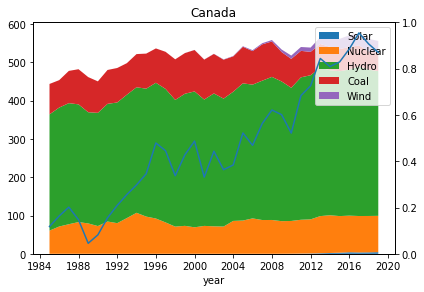

1971    433
1972    449
1973    485
1974    466
1975    433
Name: France_ghg, dtype: int64


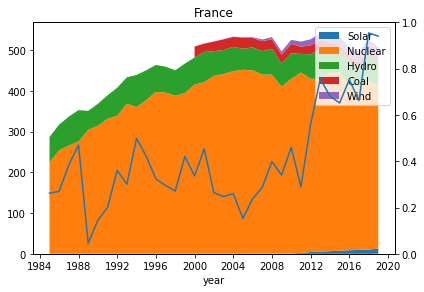

1971     994
1972    1018
1973    1069
1974    1043
1975     990
Name: Germany_ghg, dtype: int64


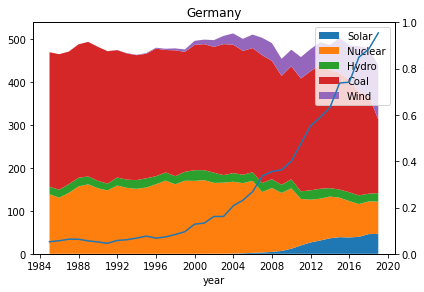

1971    762
1972    799
1973    909
1974    896
1975    860
Name: Japan_ghg, dtype: int64


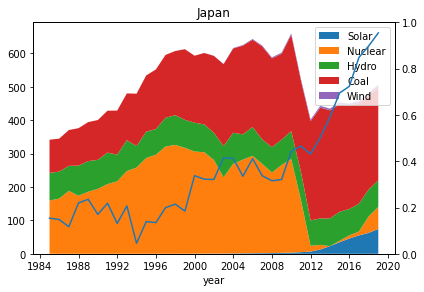

KeyError: 'China_ghg'

In [130]:
def getProductionConsumption(energy_type, type, df):
    country = df["country"][1990]
    if type == "production":
        df[f"{energy_type}_electricity_{country}"] = df[f"{energy_type}_electricity"]
        return df[f"{energy_type}_electricity_{country}"]
    elif type == "consumption":
        arr = []
        for i in range(df.shape[0]):
            total_elec = df["per_capita_electricity"][1900+i] * df["population"][1900+i]
            arr.append(total_elec * df[f"{energy_type}_share_elec"][1900+i])
        df[f"elec_consumption_{energy_type}_{country}"] = arr
        return df[f"elec_consumption_{energy_type}_{country}"]

    
def graphing1(country):
    years = []
    cGhg = ghg[country + "_ghg"]
    cGhg = cGhg.astype(int)
    
    print(cGhg.head())
    
    for i in range(1900, 2020):
        years.append(i)
    
    c = getOwidCountry(country)
    c = c.set_index(c["year"])
    c.columns.name = None
    
    testNuc = getProductionConsumption("nuclear", "production", c)
    testHydro = getProductionConsumption("hydro", "production", c)
    testSolar = getProductionConsumption("solar", "production", c)
    testCoal = getProductionConsumption("coal", "production", c)
    testWind = getProductionConsumption("wind", "production", c)
    renewables = getProductionConsumption("renewables", "production", c)
        
        
    fig, ax1 = pyplot.subplots()
    
    
    ax1.set_xlabel("year")
#     ax1.set_yticklabels([])
    ax1.stackplot(years, testSolar, testNuc, testHydro, testCoal, testWind)
    ax1.legend(["Solar", "Nuclear", "Hydro", "Coal", "Wind"])
    ax1.xaxis.set_major_locator(pyplot.MaxNLocator(10))
    ax1.tick_params(labelright='off')

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.plot(renewables)
    ax2.set_yticklabels([])
#     ax2.set_ylabel('Renewable energy for ' + country)  # we already handled the x-label with ax1
    ax2.tick_params(right=False)
#     ax2.yaxis.set_major_locator(pyplot.MaxNLocator(10))

    ax3 = ax1.twinx()
#     ax3.set_ylabel('GHG for ' + country)
#     ax3.plot(years, cGhg) 


    fig.tight_layout()
    pyplot.title(country)
    pyplot.show()


graphing1("Canada")
graphing1("France")
graphing1("Germany")
graphing1("Japan")
graphing1("China")
graphing1("Africa")

In [216]:
def regress(x, y, country):
    x = x.to_numpy()
    y = y.to_numpy()
    np.random.seed(42)
    pyplot.scatter(x, y)
    
    #define the weight of the regression line
    m = (((np.mean(x) * np.mean(y)) - np.mean(x * y)) / ((np.mean(x) ** 2) - np.mean(x ** 2)))

#     print("type x: " + str(x.dtype))
#     print("type y: " + str(y.dtype))
    
#     print(np.mean(x))
#     print(np.mean(y))
#     print(np.mean(x * y))

#     print(x.head())
#     print(y.head())
#     print((x * y).head())
    
    #define the bias of the regression line
    b = np.mean(y) - (m * np.mean(x))
    
    #define the equation of the regression line
    regression_line = [(m * xa) + b for xa in x]

    print("fitted y = " + str(m) + "x + " + str(b))
    
    #plot the graph
    pyplot.scatter(x, y)
    pyplot.title("Renewable : Fossil ratio vs GHG Emisisons")
    pyplot.plot(x, regression_line)

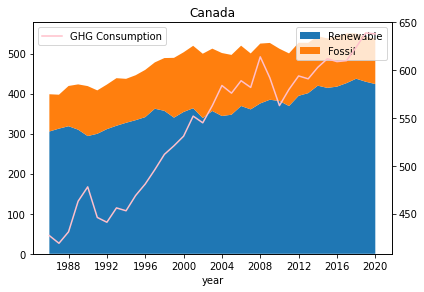

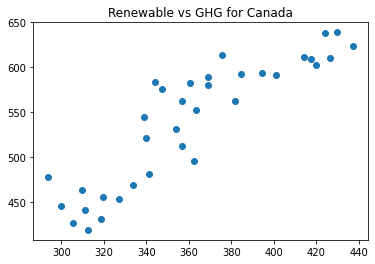

fitted y = 20.346405045704444x + 480.74210192409527


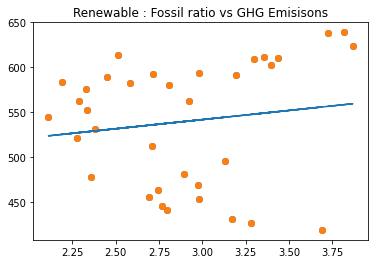

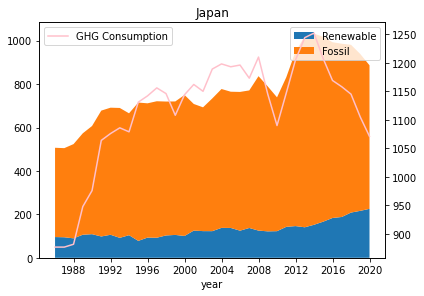

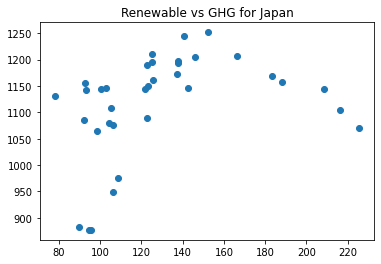

fitted y = -587.2429986591025x + 1235.3588781680019


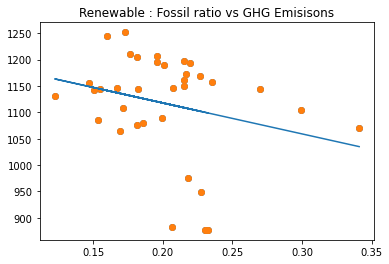

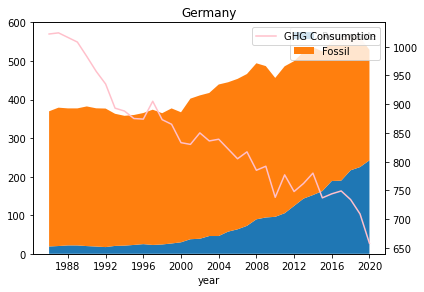

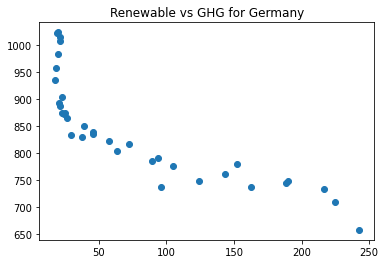

fitted y = -373.034254379995x + 922.9720523955862


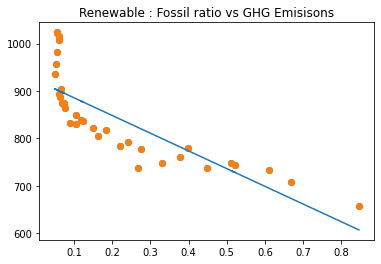

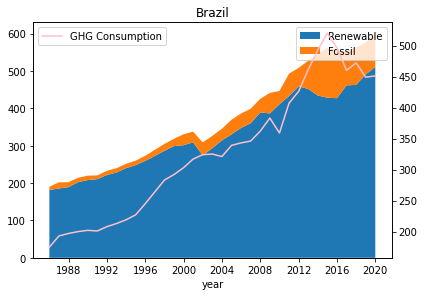

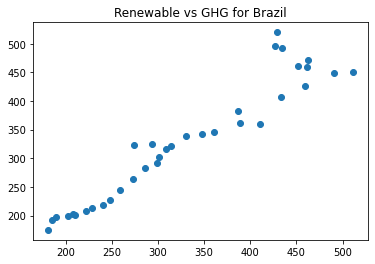

fitted y = -16.389009809310082x + 518.7692606987024


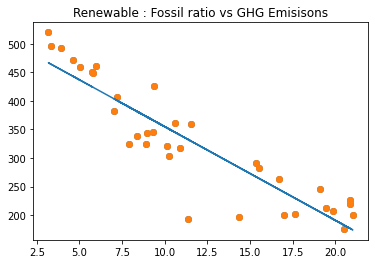

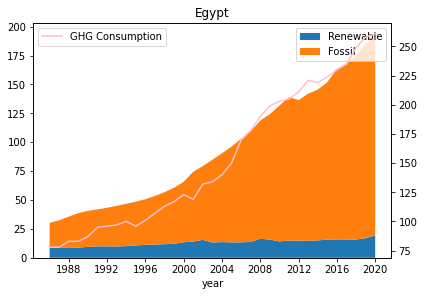

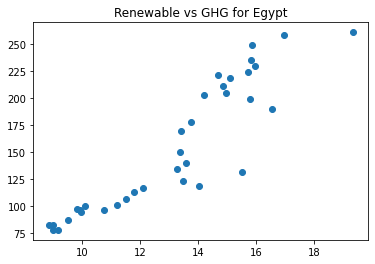

fitted y = -613.1388499537898x + 282.57633599628883


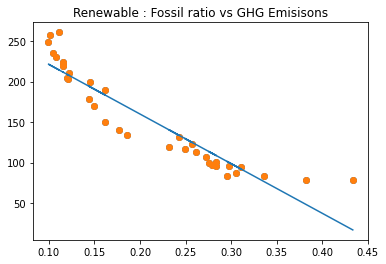

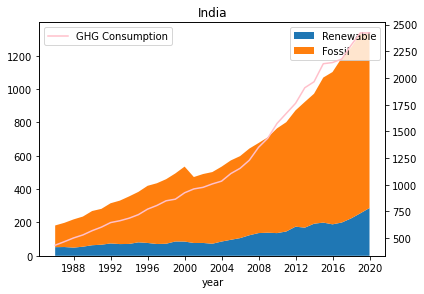

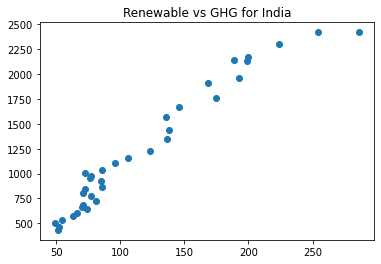

fitted y = -4504.08457688321x + 2313.555047119157


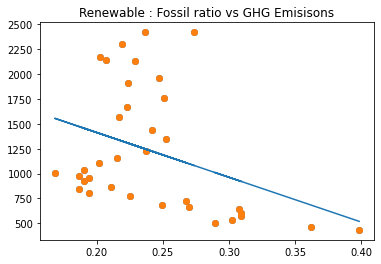

In [218]:
def graphing2(country):
    years1 = []
    years2 = []
    cGhg = ghg[country + "_ghg"]
    
    cGhg = pd.to_numeric(cGhg, errors='coerce')
    cGhg = cGhg[14:-1]
        
    for i in range(1986, 2021):
        years1.append(i)
    
    c = getOwidCountry(country)
    c = c.set_index(c["year"])
    c.columns.name = None
    
    renewables = getProductionConsumption("renewables", "production", c)
    fossil = getProductionConsumption("fossil", "production", c)
    renewables = renewables[85:]
    fossil = fossil[85:]
    
        
    fig, ax1 = pyplot.subplots()
    
    
    ax1.set_xlabel("year")
    ax1.stackplot(years1, renewables, fossil)
    ax1.legend(["Renewable", "Fossil"])
    ax1.xaxis.set_major_locator(pyplot.MaxNLocator(10))
    ax1.tick_params(labelright='off')
    
    ax2 = ax1.twinx()
    ax2.plot(years1, cGhg, color='pink')
    ax2.legend(["GHG Consumption"])

    fig.tight_layout()
    pyplot.title(country)
    pyplot.show()
    
    pyplot.title("Renewable vs GHG for " + country)
    pyplot.scatter(renewables, cGhg)
    pyplot.show()
    
    ratio = renewables.div(fossil)
    
    regress(ratio, cGhg, country)


graphing2("Canada")
graphing2("Japan")
graphing2("Germany")
graphing2("Brazil")
graphing2("Egypt")
graphing2("India")

In [213]:
#define a random seed
np.random.seed(42)

#create random points for the x and y axis from 0 to 20
xs = np.linspace(0, 20, 50)
ys = np.linspace(20, 0, 50)

# add some positive and negative noise on the y axis
ys += np.random.uniform(-2, 2, 50)
ys += np.random.uniform(-2, 2, 50)

print(xs.head())
print(ys.head
print((xs * ys).head())

#define the weight of the regression line
m = (((np.mean(xs) * np.mean(ys)) - np.mean(xs * ys)) /
    ((np.mean(xs) ** 2) - np.mean(xs ** 2)))

#define the bias of the regression line
b = np.mean(ys) - (m * np.mean(xs))

#define the equation of the regression line
regression_line = [(m * x) + b for x in xs]

#plot the graph
pyplot.plot(xs, ys, '.')
pyplot.plot(xs, regression_line)

AttributeError: 'numpy.ndarray' object has no attribute 'head'